### [https://www.saedsayad.com/classification.html *****](https://www.saedsayad.com/classification.htm)
# `Logistic Regression -------------------------------`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Rownumber, CustermerId and Surname are of no use 

In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### HasCrCard, IsActiveMember and Exited should be of datatype object

In [7]:
conversion_columns = ['HasCrCard','IsActiveMember','Exited']
for cols in conversion_columns:
    data[cols] = data[cols].astype('object')
    

In [8]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [9]:
target = 'Exited'
cont_columns = data.select_dtypes(['int64','float64']).columns
cat_columns = list(filter(lambda x: x!='Exited',data.select_dtypes('object').columns))

In [10]:
cont_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [11]:
cat_columns

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [12]:
target

'Exited'

In [13]:
for col in cat_columns:
    print(f'Column unique {col} ==>> {data[col].nunique()}')

Column unique Geography ==>> 3
Column unique Gender ==>> 2
Column unique HasCrCard ==>> 2
Column unique IsActiveMember ==>> 2


### Continious vs Target ( T-test ) 

CreditScore => t-test result => Ttest_indResult(statistic=2.7100778888729833, pvalue=0.006738213892192373)

Age => t-test result => Ttest_indResult(statistic=-29.76681499437077, pvalue=1.2399313093427738e-186)

Tenure => t-test result => Ttest_indResult(statistic=1.4000584366735584, pvalue=0.16152684949473256)

Balance => t-test result => Ttest_indResult(statistic=-11.936240300013841, pvalue=1.2755633191525477e-32)

NumOfProducts => t-test result => Ttest_indResult(statistic=4.786984698423093, pvalue=1.717333004804293e-06)

EstimatedSalary => t-test result => Ttest_indResult(statistic=-1.2096536380192642, pvalue=0.22644042802223346)



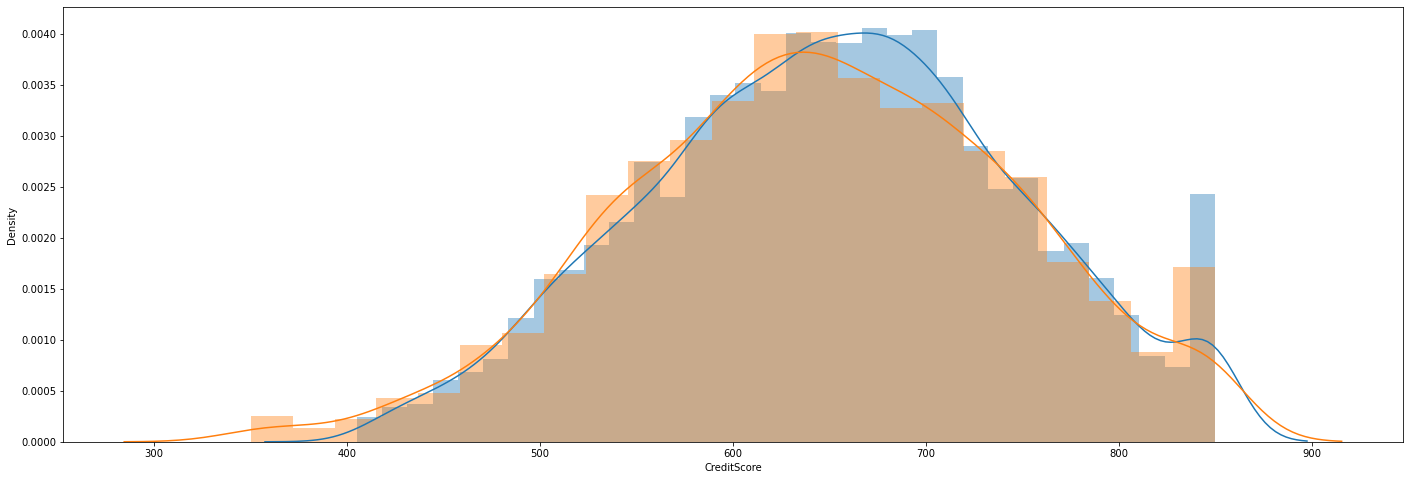

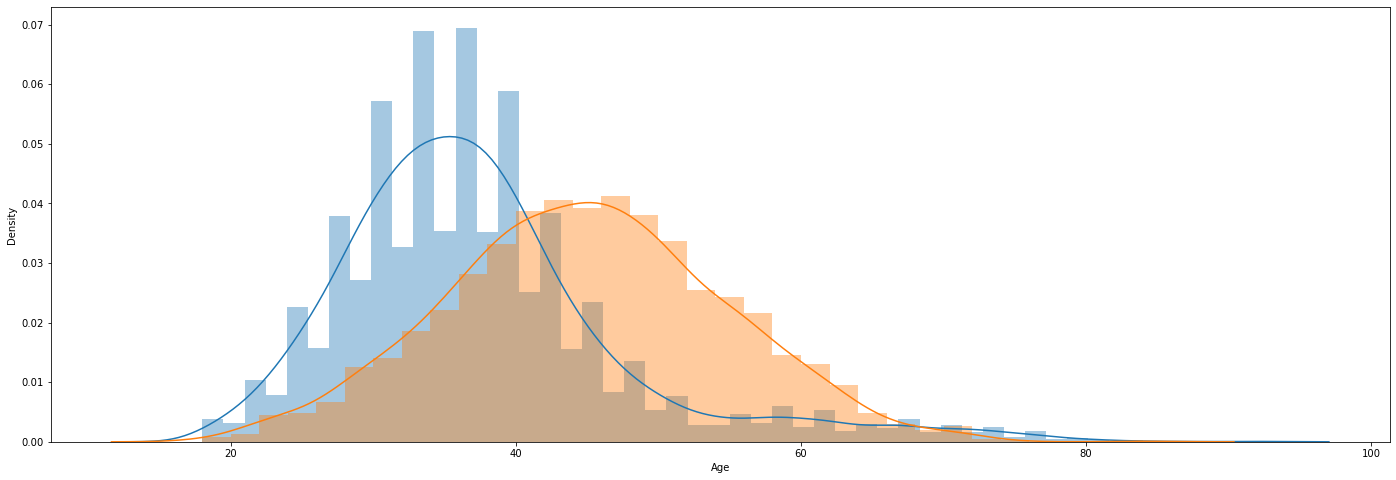

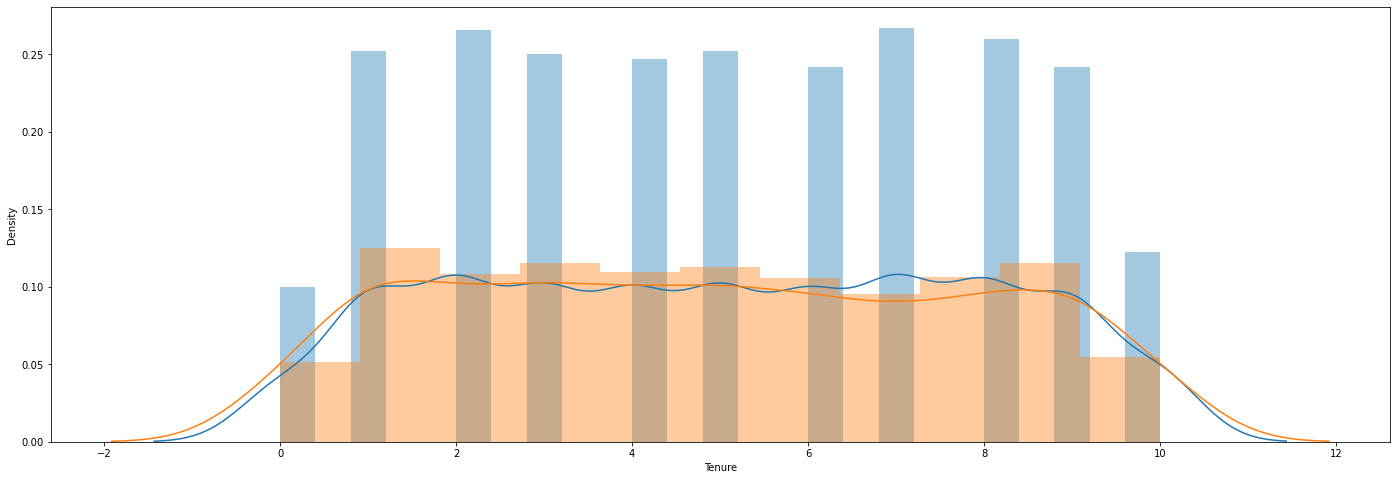

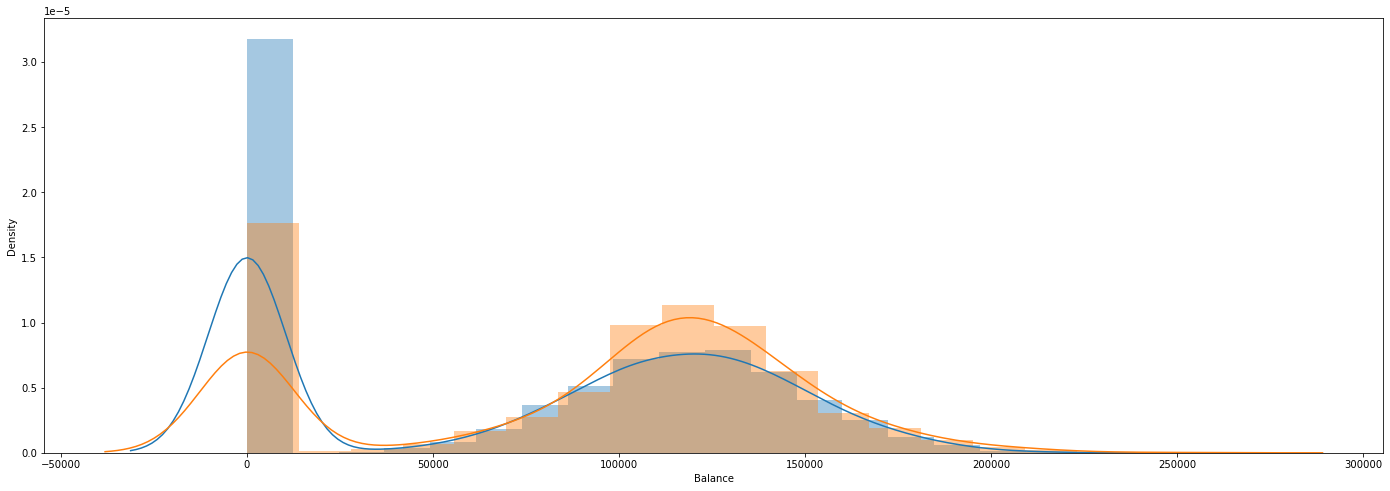

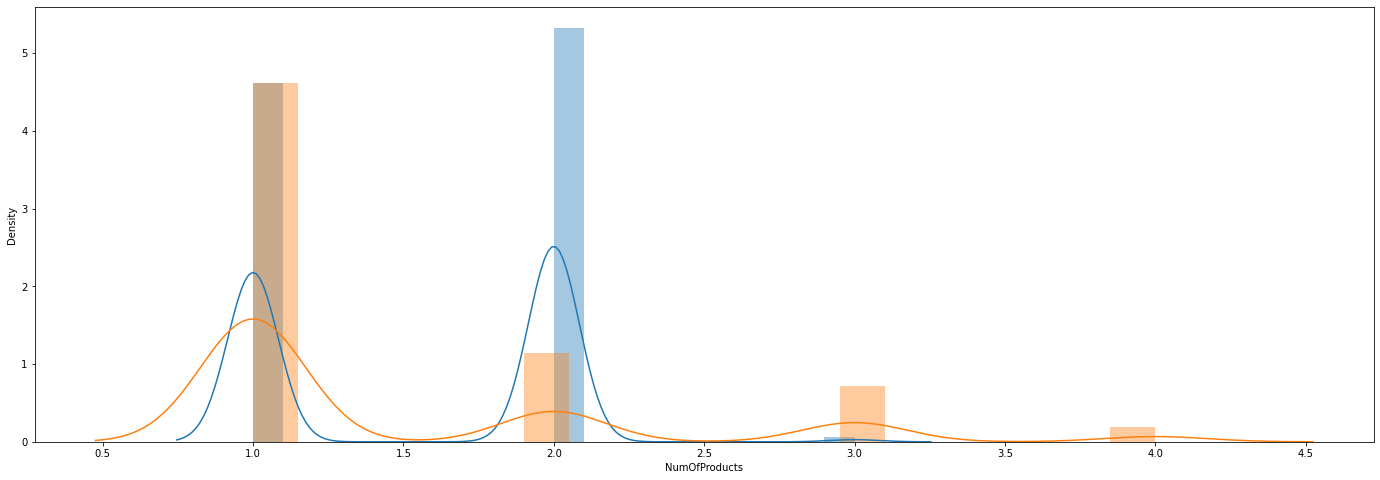

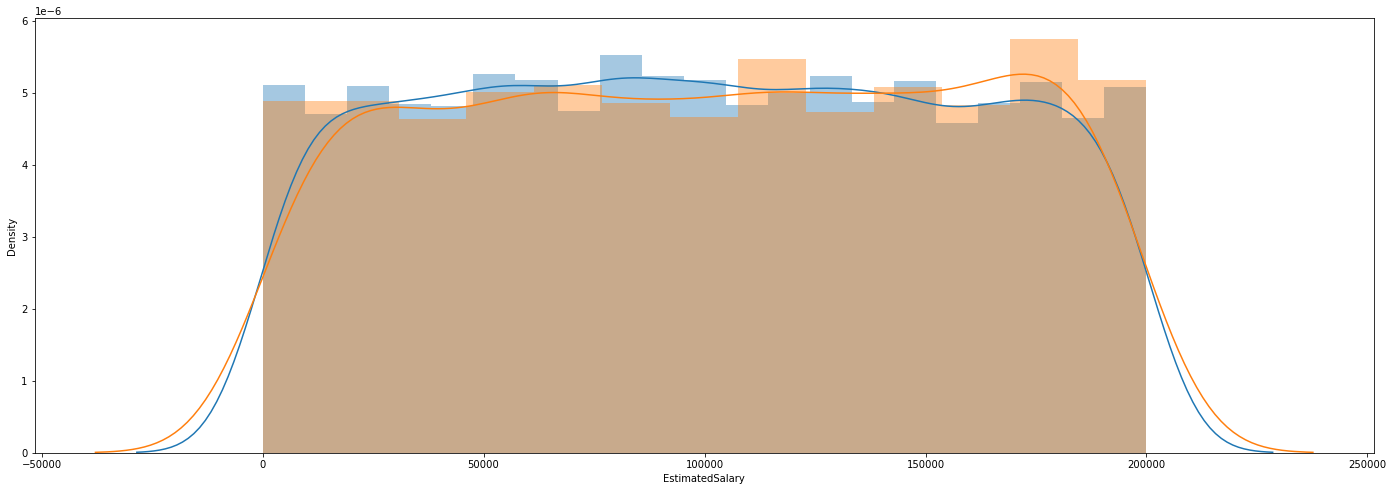

In [14]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[target]==0,col]
    grp2 = data.loc[data[target]==1,col]
    t_test_plot(col,grp1,grp2)

`EstimatedSalary and Tenure are not related to Exited, so we should drop them`

### Categorical vs Target ( chi square test ) 

In [15]:
from scipy.stats import chi2_contingency

def chisq_test(target,independent_col,data):
    two_way = pd.crosstab(data[target],data[independent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f'{independent_col} => chi-square result p-values => {chi_test_result[1]}')

In [16]:
for col in cat_columns:
    chisq_test(target,col,data)

Geography => chi-square result p-values => 3.830317605354266e-66
Gender => chi-square result p-values => 2.2482100097131755e-26
HasCrCard => chi-square result p-values => 0.49237236141554686
IsActiveMember => chi-square result p-values => 8.785858269303703e-55


`HasCrCard is not related to Exited, we should drop it`

### Drop columns which are not related to target

In [17]:
not_related = ['HasCrCard','EstimatedSalary','Tenure']
data.drop(not_related,axis=1,inplace=True)

In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0


### Split the data

In [19]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [20]:
X

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0
9996,516,France,Male,35,57369.61,1,1
9997,709,France,Female,36,0.00,1,1
9998,772,Germany,Male,42,75075.31,2,0


In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### I cannot use this to fit my model, I have to do encoding

### `Label Encoder`

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_train['Gender'])
X_train.loc[:,'Gender'] = le.transform(X_train['Gender'])
X_test.loc[:,'Gender'] = le.transform(X_test['Gender'])

In [24]:
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
9254,686,France,1,32,0.00,2,1
1561,632,Germany,1,42,119624.60,2,1
1670,559,Spain,1,24,114739.92,1,0
6087,561,France,0,27,135637.00,1,0
6669,517,France,1,56,142147.32,1,0
...,...,...,...,...,...,...,...
5734,768,France,1,54,69712.74,1,1
5191,682,France,0,58,0.00,1,1
5390,735,France,0,38,0.00,3,0
860,667,France,1,43,190227.46,1,0


### `Label Binarizer / One Hot Encoding / dummy variable`

In [25]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(data['Geography'])

LabelBinarizer()

### to explain three categories two columns are sufficient, you can drop any

In [26]:
encoded_df = pd.DataFrame(lb.transform(X_train['Geography']),columns=lb.classes_)
encoded_df.drop(['Germany'],axis=1,inplace=True)

In [27]:
X_train = pd.concat([X_train.reset_index(),encoded_df],axis=1)
X_train

,index,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,9254,686,France,1,32,0.00,2,1,1,0
1,1561,632,Germany,1,42,119624.60,2,1,0,0
2,1670,559,Spain,1,24,114739.92,1,0,0,1
3,6087,561,France,0,27,135637.00,1,0,1,0
4,6669,517,France,1,56,142147.32,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7995,5734,768,France,1,54,69712.74,1,1,1,0
7996,5191,682,France,0,58,0.00,1,1,1,0
7997,5390,735,France,0,38,0.00,3,0,1,0
7998,860,667,France,1,43,190227.46,1,0,1,0


In [28]:
X_train.drop(['Geography','index'],axis=1,inplace=True)

In [29]:
X_train

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,686,1,32,0.00,2,1,1,0
1,632,1,42,119624.60,2,1,0,0
2,559,1,24,114739.92,1,0,0,1
3,561,0,27,135637.00,1,0,1,0
4,517,1,56,142147.32,1,0,1,0
...,...,...,...,...,...,...,...,...
7995,768,1,54,69712.74,1,1,1,0
7996,682,0,58,0.00,1,1,1,0
7997,735,0,38,0.00,3,0,1,0
7998,667,1,43,190227.46,1,0,1,0


### Similarly this to be done for test data

In [30]:
encoded_df = pd.DataFrame(lb.transform(X_test['Geography']),columns=lb.classes_)
X_test = pd.concat([X_test.reset_index(),encoded_df],axis=1)
X_test.drop(['Geography','Germany','index'],axis=1,inplace=True)

In [31]:
X_test

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,596,1,32,96709.07,2,0,0,0
1,623,1,43,0.00,2,1,1,0
2,601,0,44,0.00,2,0,0,1
3,506,1,59,119152.10,2,1,0,0
4,560,0,27,124995.98,1,1,0,1
...,...,...,...,...,...,...,...,...
1995,602,0,53,98268.84,1,1,0,0
1996,609,1,25,0.00,1,1,1,0
1997,730,0,47,0.00,1,0,1,0
1998,692,1,29,0.00,1,0,1,0


### Now Scaling of the data

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[['CreditScore','Age','Balance']])

StandardScaler()

In [33]:
X_train[['CreditScore','Age','Balance']] = sc.transform(X_train[['CreditScore','Age','Balance']])
X_test[['CreditScore','Age','Balance']] = sc.transform(X_test[['CreditScore','Age','Balance']])

In [34]:
X_train

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Spain
0,0.356500,1,-0.655786,-1.218471,2,1,1,0
1,-0.203898,1,0.294938,0.696838,2,1,0,0
2,-0.961472,1,-1.416365,0.618629,1,0,0,1
3,-0.940717,0,-1.131148,0.953212,1,0,1,0
4,-1.397337,1,1.625953,1.057449,1,0,1,0
...,...,...,...,...,...,...,...,...
7995,1.207474,1,1.435808,-0.102301,1,1,1,0
7996,0.314989,0,1.816097,-1.218471,1,1,1,0
7997,0.865009,0,-0.085351,-1.218471,3,0,1,0
7998,0.159323,1,0.390011,1.827259,1,0,1,0


### Logistic Regression

## `*** Sklearn logistic regression internally uses gradient descent ***`

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.astype(int))

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.77343875, 0.22656125],
       [0.9270735 , 0.0729265 ],
       [0.6834002 , 0.3165998 ],
       ...,
       [0.65328361, 0.34671639],
       [0.91898443, 0.08101557],
       [0.83981054, 0.16018946]])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1541   66]
 [ 311   82]]
Accuracy => 0.8115


### Here we get only 81% accuracy,Now I am going to improvise accuracy, for that I have to go for univariate analysis
### Manual Threshold Finding

<AxesSubplot:xlabel='Exited', ylabel='count'>

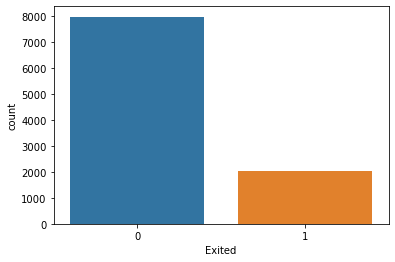

In [39]:
import seaborn as sns
sns.countplot(data['Exited'])

### We want probabilities of .5 to give model the fair chance, but the actual probabilities are

In [40]:
data['Exited'].value_counts() / data.shape[0]

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [41]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.77343875, 0.22656125],
       [0.9270735 , 0.0729265 ],
       [0.6834002 , 0.3165998 ],
       ...,
       [0.65328361, 0.34671639],
       [0.91898443, 0.08101557],
       [0.83981054, 0.16018946]])

### We manually fixed .796 as threshold

In [42]:
import numpy as np
y_pred = np.where(y_pred_proba[:,1]<.796,0,1)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1604    3]
 [ 386    7]]
Accuracy => 0.8055


### but it reduced accuracy, so adjust probaibility manually to get better accuracy
### `Finding adjust threshold to get better accuracy`

In [44]:
y_pred = np.where(y_pred_proba[:,1]<.78,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1604    3]
 [ 384    9]]
Accuracy => 0.8065


In [45]:
y_pred = np.where(y_pred_proba[:,1]<.75,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1603    4]
 [ 382   11]]
Accuracy => 0.807


In [46]:
y_pred = np.where(y_pred_proba[:,1]<.70,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1597   10]
 [ 374   19]]
Accuracy => 0.808


## `ROC and AUC`
![](https://www.kdnuggets.com/wp-content/uploads/nagesh-metrics-1.png)
![](https://keytodatascience.com/wp-content/uploads/2019/09/accuracy.jpg)

### Accuracy

In [47]:
accuracy = (19+1597)/len(y_test)
accuracy

0.808

### True positive rate / Recall / Sensitivity = TP / ( FN + TP )

In [48]:
true_positive_rate = 19 / (374+19)
true_positive_rate

0.04834605597964377

### False positive rate = FP / ( TN + FP )

In [49]:
false_positive_rate = 10 / (1597+10)
false_positive_rate

0.006222775357809583

### `Finding Threshold using ROC and checking algo performance by AUC`

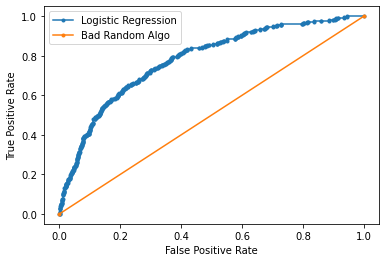

AUC is => 0.7787700439077764


In [50]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test.astype(int),lr_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC is => {lr_auc}')

In [51]:
thresholds_1

array([1, 0])

In [52]:
thesholds_2

array([1.92207688, 0.92207688, 0.86887367, 0.83174409, 0.82794247,
       0.78148675, 0.77534753, 0.75913381, 0.74991171, 0.72594699,
       0.72362128, 0.71225512, 0.70768365, 0.70375175, 0.70096173,
       0.6998165 , 0.68715935, 0.68678589, 0.68531529, 0.67797922,
       0.67480474, 0.6602765 , 0.65415205, 0.65342123, 0.65136943,
       0.63531752, 0.63456397, 0.63055445, 0.62426775, 0.62303215,
       0.62265459, 0.61674618, 0.61066627, 0.60819264, 0.60388239,
       0.58857793, 0.58367199, 0.58052139, 0.57243734, 0.572257  ,
       0.5721055 , 0.57099319, 0.56810717, 0.56804393, 0.56192973,
       0.55712814, 0.55712067, 0.55671395, 0.55381687, 0.55261199,
       0.55124636, 0.54840384, 0.54761071, 0.54096414, 0.53593511,
       0.53484024, 0.53460365, 0.53453276, 0.52820521, 0.52667325,
       0.52648547, 0.52422107, 0.52317016, 0.52248389, 0.51812809,
       0.5138529 , 0.51076392, 0.50924189, 0.50509782, 0.50387028,
       0.50183963, 0.50155256, 0.49886385, 0.49020112, 0.48830

In [53]:
y_pred = np.where(y_pred_proba[:,1]<.70,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.808


In [54]:
y_pred = np.where(y_pred_proba[:,1]<.60,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.8135


In [55]:
from sklearn.metrics import precision_score
print(f'Precision => {precision_score(y_test.astype(int),y_pred)}')

Precision => 0.6388888888888888


In [56]:
from sklearn.metrics import recall_score
print(f'Recall => {recall_score(y_test.astype(int),y_pred)}')

Recall => 0.11704834605597965


### `.60 to .80 you can choose any value to find best accuracy`

### Precision = TP / ( TP + FP ) 
### F1 score = 2 * Precision * Recall / ( Precision + Recall )

### `Formulae list`:
<br />

![](https://www.researchgate.net/publication/325567208/figure/tbl4/AS:668664739151911@1536433505975/Classification-performance-metrics-based-on-the-confusion-matrix.png)

## `Finding threshold using LogLoss[Don't use this method], only for reference (not purely MLE)`

In [57]:
class threshold:
    def __init__(self):
        self.th = 0.5  # initially starting with 0.5
        
    def predict_threshold(self,y):   # predict threshold
        if y >= self.th:
            return 1
        return 0

In [58]:
from sklearn.metrics import log_loss

### `Finding LogLoss`
![](https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG)

In [59]:
lr_prob = y_pred_proba[:,1]
different_threshold = np.linspace(0,1,num=10)
pre = threshold()
log_losses = []
for t in different_threshold:
    pre.th = t
    yy = pd.Series(lr_prob)
    y_pred = yy.apply(pre.predict_threshold)
    loss =  log_loss(y_test.astype(int),y_pred.astype(int))
    print(f'Threshold => {t} and Loss => {loss}')
    log_losses.append(loss)

Threshold => 0.0 and Loss => 27.75254930984589
Threshold => 0.1111111111111111 and Loss => 17.21796304003204
Threshold => 0.2222222222222222 and Loss => 9.394713095882471
Threshold => 0.3333333333333333 and Loss => 6.5969766560017975
Threshold => 0.4444444444444444 and Loss => 6.596941873513584
Threshold => 0.5555555555555556 and Loss => 6.389688425610935
Threshold => 0.6666666666666666 and Loss => 6.6141816766061226
Threshold => 0.7777777777777777 and Loss => 6.6832544318113625
Threshold => 0.8888888888888888 and Loss => 6.80413934959612
Threshold => 1.0 and Loss => 6.78686956159995


### `Plotting`

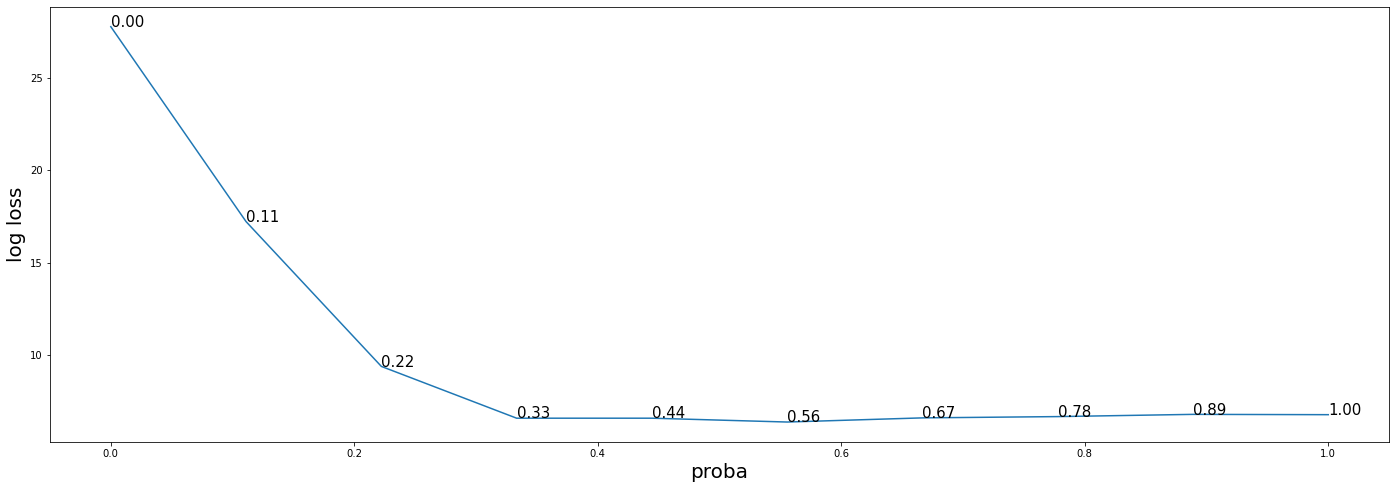

In [60]:
plt.figure(figsize=(24,8))
plt.plot(different_threshold,log_losses)

for i,p in enumerate(different_threshold):
    plt.text(different_threshold[i],log_losses[i],"%0.2f"%(p),fontsize=15)

plt.xlabel("proba",fontsize=20)
plt.ylabel("log loss",fontsize=20)
plt.show()

In [61]:
index = np.array(log_losses).argmin()   # best threshold
different_threshold[index]

0.5555555555555556

### Fit the model

In [62]:
y_pred = np.where(y_pred_proba[:,1]<0.5555555555555556,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.815


In [63]:
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1570   37]
 [ 333   60]]


In [64]:
from sklearn.metrics import precision_score
print(f'Precision => {precision_score(y_test.astype(int),y_pred)}')

Precision => 0.6185567010309279


In [65]:
from sklearn.metrics import recall_score
print(f'Recall => {recall_score(y_test.astype(int),y_pred)}')

Recall => 0.15267175572519084


-------

<br />
<br />
<br />
<br />

# `Naive Bayes -----------------------------------------------------`
### [Naive Bayes from scratch](http://localhost:8888/notebooks/Classification/Naive%20Bayes.ipynb)

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train.astype(int))
y_pred = nb.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.astype(int),y_pred))

[[1563   44]
 [ 289  104]]


In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8335


In [72]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7027027027027027


In [73]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.26463104325699743


### `precision-recall tradeoff`

In [74]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.3844731977818853


### `Don't just rely on accuracy, check all matrics`
### `This algorithm increased accuracy, precision and recall score upto a significant level`
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/image23.gif)

-------

<br />
<br />
<br />
<br />

# `Decision Tree -----------------------------------------------------`

### Parameter 1: Entropy

In [231]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X_train,y_train.astype(int))

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [232]:
y_pred = tree.predict(X_test)

In [233]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.839


In [234]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.784


In [235]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.24936386768447838


In [236]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.3783783783783784


### Parameter 2: Gini

In [237]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=5)
tree.fit(X_train,y_train.astype(int))

DecisionTreeClassifier(max_depth=5)

In [238]:
y_pred = tree.predict(X_test)

In [239]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.859


In [240]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7707317073170732


In [241]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.4020356234096692


In [242]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.528428093645485


In [243]:
y_prob_tree = tree.predict_proba(X_test)

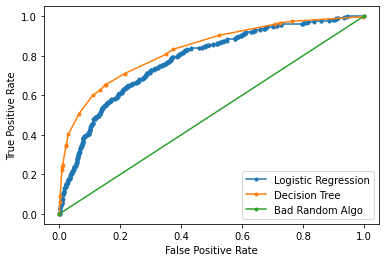

AUC of Logistic Regression is => 0.7787700439077764
AUC of Decsion tree is => 0.8288261755582685


In [244]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test.astype(int),lr_prob)

tr_prob = y_prob_tree[:,1]
tr_auc = roc_auc_score(y_test.astype(int),tr_prob)   # Decision tree
tr_fpr,tr_tpr,thesholds_3 = roc_curve(y_test.astype(int),tr_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(tr_fpr,tr_tpr,marker='.',label='Decision Tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC of Logistic Regression is => {lr_auc}')
print(f'AUC of Decsion tree is => {tr_auc}')

### `Feature Importances`

In [245]:
tree.feature_importances_

array([0.00551524, 0.        , 0.44026934, 0.03410563, 0.3417453 ,
       0.17016848, 0.00819602, 0.        ])

******************************Feature Importance******************************


Text(0.5, 0, 'Support')

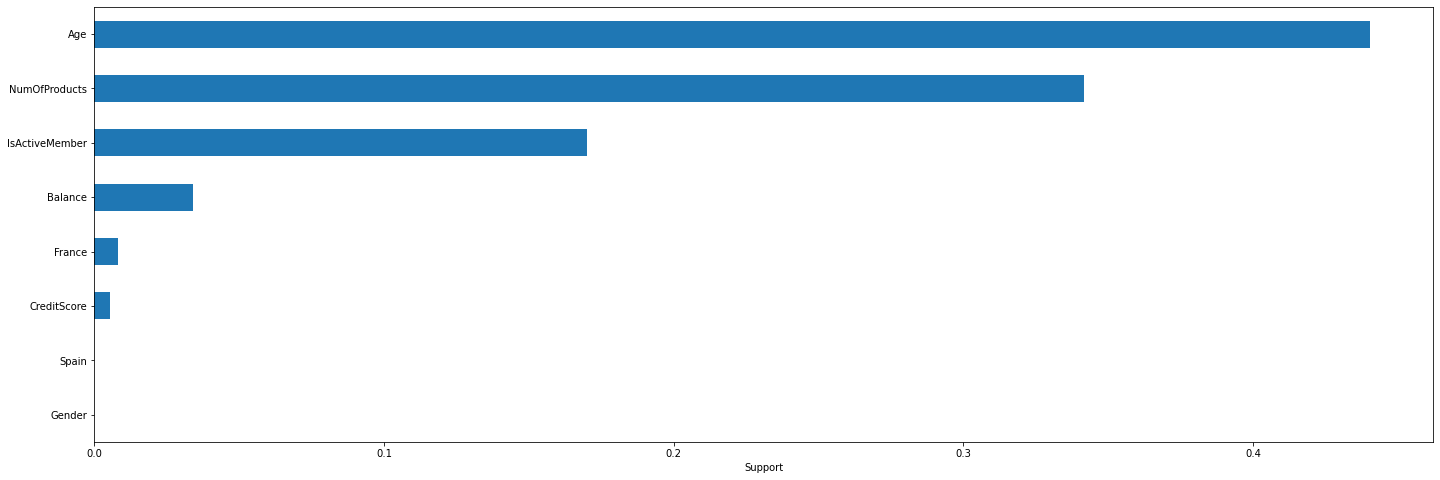

In [246]:
imp_feature = tree.tree_.compute_feature_importances()
print('*'*30+'Feature Importance'+'*'*30)
plt.figure(figsize=(24,8))
pd.Series(imp_feature,index=X_train.columns).sort_values().plot.barh()
plt.xlabel('Support')

#### `Age column contributing more towards decision of prediction`

### `Plot Tree`

In [247]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train,y_train.astype(int))

DecisionTreeClassifier(max_depth=3)

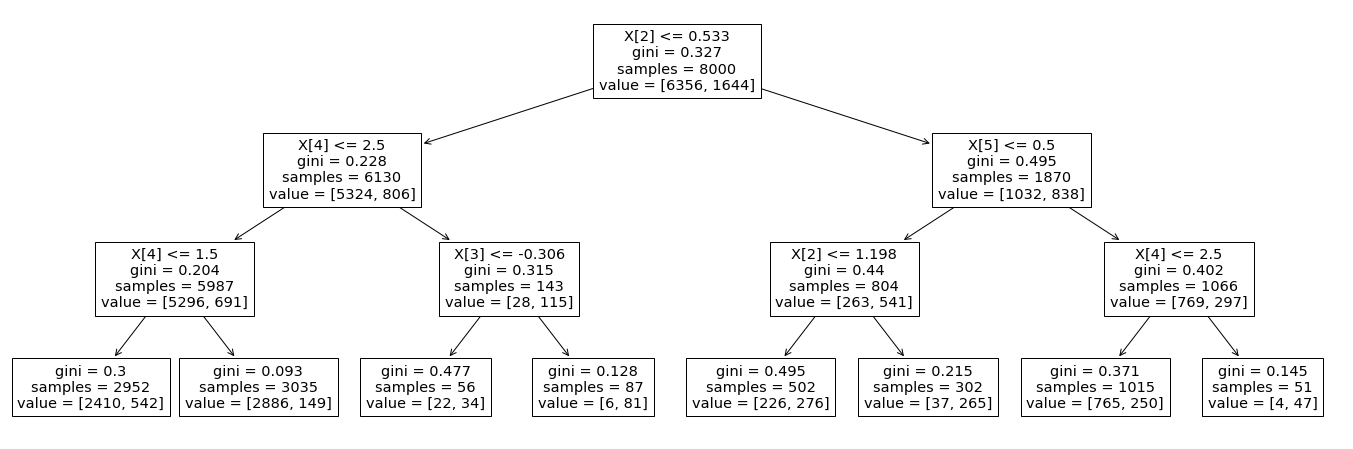

In [248]:
plt.figure(figsize=(24,8))
plot_tree(tree)
plt.show()

### `Grid Search: Find best parameters`

In [249]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[2,4,5,6,7,8,14,15]
}

tree = DecisionTreeClassifier()

#### `recall`

In [250]:
tree_grid = GridSearchCV(tree,param_grid,n_jobs=-1,scoring='recall')

In [251]:
tree_grid.fit(X_train,y_train.astype(int))

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 14, 15]},
             scoring='recall')

In [252]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 15}

#### `precision`

In [253]:
tree_grid = GridSearchCV(tree,param_grid,n_jobs=-1,scoring='precision')

In [254]:
tree_grid.fit(X_train,y_train.astype(int))

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 14, 15]},
             scoring='precision')

In [255]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

#### `accuracy`

In [256]:
tree_grid = GridSearchCV(tree,param_grid,n_jobs=-1,scoring='accuracy')

In [257]:
tree_grid.fit(X_train,y_train.astype(int))

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 14, 15]},
             scoring='accuracy')

In [258]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### `Decision tree is prone to overfit a lot *****`

-------

<br />
<br />
<br />
<br />

# `Random Forest -----------------------------------------------------`

### Ensembling:
    1. Bagging/Bootstraping=> Random Forest
    2. Boosting
    3. Stacking

In [259]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train.astype(int))
y_pred = rf.predict(X_test)

In [260]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8615


In [261]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7132352941176471


In [262]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.49363867684478374


In [263]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5834586466165413


### Extrapolation tree will not work, only interpolation tree will work, that is a disadvantage of a decisiion tree being used as a linear regression for a regression

In [264]:
y_prob_rf = rf.predict_proba(X_test)

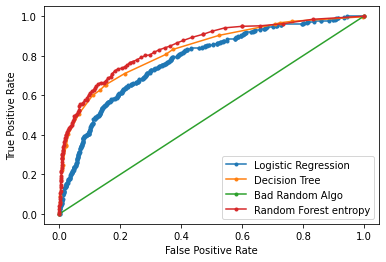

AUC of Logistic Regression is => 0.7787700439077764
AUC of Decsion tree is => 0.8288261755582685
AUC of Random Forest tree is => 0.8493914189036199


In [265]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test.astype(int),lr_prob)

tr_prob = y_prob_tree[:,1]
tr_auc = roc_auc_score(y_test.astype(int),tr_prob)   # Decision tree
tr_fpr,tr_tpr,thesholds_3 = roc_curve(y_test.astype(int),tr_prob)

rf_prob = y_prob_rf[:,1]
rf_auc = roc_auc_score(y_test.astype(int),rf_prob)   # random forest
rf_fpr,rf_tpr,thesholds_4 = roc_curve(y_test.astype(int),rf_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(tr_fpr,tr_tpr,marker='.',label='Decision Tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest entropy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC of Logistic Regression is => {lr_auc}')
print(f'AUC of Decsion tree is => {tr_auc}')
print(f'AUC of Random Forest tree is => {rf_auc}')

### For extrapolation of a regression model decision tree is not advised to use

-------

<br />
<br />
<br />
<br />

# `Manual implementation of Cross Validation ---------`
- `Will detect and prevent us from overfitting` 

In [266]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
accuracy = cross_val_score(rf,X_train,y_train.astype(int),cv=10,scoring='accuracy')

#### statistical analysis to check how much it is varying, whether it is skewed

<AxesSubplot:ylabel='Density'>

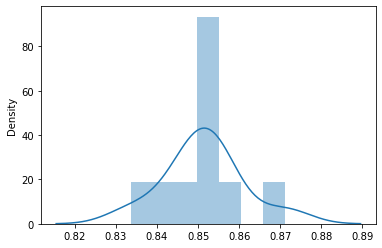

In [267]:
sns.distplot(accuracy)

In [268]:
np.mean(accuracy)

0.851375

In [269]:
np.std(accuracy)

0.009176226076116479

#### `check any function code strategy`

In [270]:
# from sklearn.model_selection import cross_val_score
# cross_val_score??

### This is manually, but usually it is done in GridSearchCV, you can pass your number of cv here


<br />
<br />
<br />
<br />

# ` Voting Classifier ------------------------------------------`
--------
### - [Voting Classifier sklearn => one way to improve accuracy](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [272]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = GaussianNB()

In [273]:
eclf1 = eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])

In [274]:
eclf1.fit(X_train,y_train.astype(int))

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(n_estimators=50)),
                             ('gnb', GaussianNB())])

In [275]:
y_pred = eclf1.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8375


In [277]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7098765432098766


In [278]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.2926208651399491


In [279]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.41441441441441446



<br />
<br />
<br />
<br />

# ` Stacking -----------------------------------------------------`
--------

### Ensembling:
    1. Bagging/Bootstraping
    2. Boosting
    3. Stacking => Stacking Classifier
[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

#### - [We can have multiple stages in statcking](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/)
#### - [For just two layers you can use statcking classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

### `It is just for 2 layers, for more than 3 we have to code it manually ******`

In [280]:
from sklearn.ensemble import StackingClassifier

In [281]:
from sklearn.ensemble import RandomForestClassifier  # base estimator
from sklearn.naive_bayes import GaussianNB  # base estimator

from sklearn.linear_model import LogisticRegression   # final classifier

In [282]:
estimators = [('rf',RandomForestClassifier(n_estimators=10,random_state=42)),('nb',GaussianNB())]
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [283]:
clf.fit(X_train,y_train.astype(int))

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [284]:
y_pred = clf.predict(X_test)

In [285]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.864


In [286]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7574468085106383


In [287]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.4529262086513995


In [288]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5668789808917198



<br />
<br />
<br />
<br />

# ` AdaBoost Classifier --------------------------------------------`
--------

### Ensembling:
    1. Bagging/Bootstraping
    2. Boosting => AdaBoost
    3. Stacking
- [Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [Analytics Vidhya AdaBoost Blog](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/)

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
tree = DecisionTreeClassifier(criterion='gini')
lr = LogisticRegression()

In [290]:
from sklearn.ensemble import AdaBoostClassifier

### Base Learner => Decision tree

In [291]:
model_adaBoost = AdaBoostClassifier(n_estimators=100,random_state=42)  # n_estimators => iterations of ml algo

In [292]:
model_adaBoost.fit(X_train,y_train.astype(int))

AdaBoostClassifier(n_estimators=100, random_state=42)

In [293]:
y_pred = model_adaBoost.predict(X_test)

In [294]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.856


In [295]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.6895306859205776


In [296]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.4860050890585242


In [297]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5701492537313433


In [298]:
model_adaBoost.feature_importances_

array([0.27, 0.01, 0.36, 0.24, 0.05, 0.01, 0.03, 0.03])

******************************Feature Importance******************************


Text(0.5, 0, 'Support')

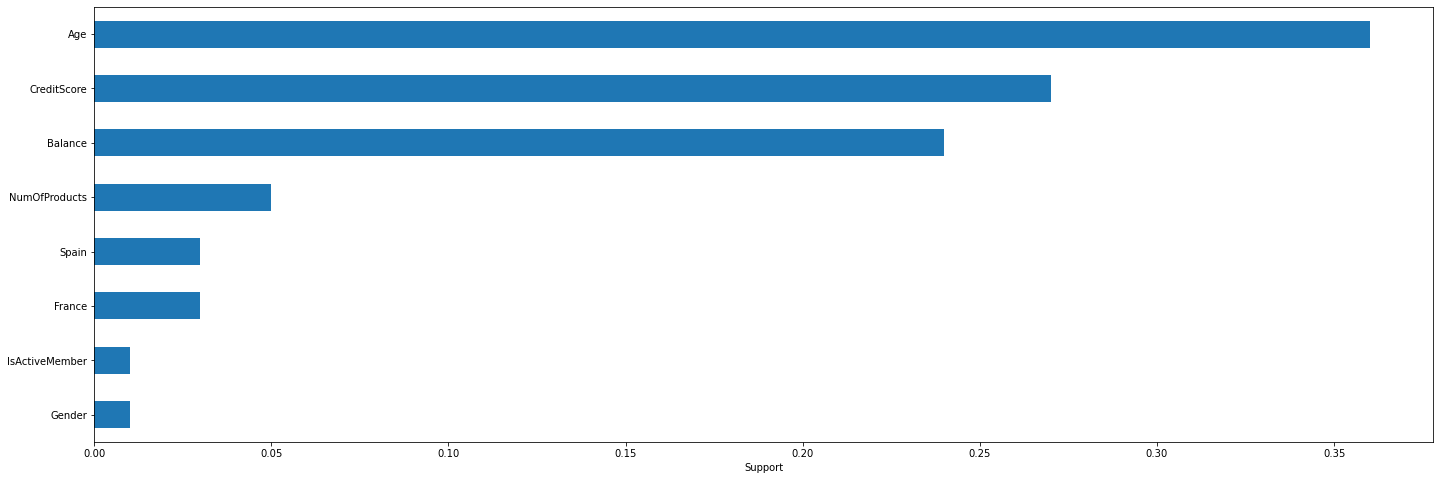

In [299]:
imp_feature = model_adaBoost.feature_importances_
print('*'*30+'Feature Importance'+'*'*30)
plt.figure(figsize=(24,8))
pd.Series(imp_feature,index=X_train.columns).sort_values().plot.barh()
plt.xlabel('Support')

## `tree is causing problem in features importances, Why nan ask milan sir ???`

### Base Learner => Logistic Regression

In [300]:
model_adaBoost = AdaBoostClassifier(base_estimator=lr,n_estimators=100)

In [301]:
model_adaBoost.fit(X_train,y_train.astype(int))

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [302]:
y_pred = model_adaBoost.predict(X_test)

In [303]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8095


In [304]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.5422535211267606


In [305]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.19592875318066158


In [306]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.2878504672897196


### `Base model can be any ML algorithm *************** `


<br />
<br />
<br />
<br />

# ` Responsiblities while reading Algorithm ---------------------`
--------

##### 1. Advantages of algorithm
##### 2. Disadvantages of algorithm
##### 3. Working of the model
##### 4. Assumptions
##### 5. Equations => How internally it works
##### 6. Implementation
##### 7. On what kind of a data it can work


<br />
<br />
<br />
<br />

# `Gradient Boosting Tree --------------------------------------------`
--------

### Ensembling:
    1. Bagging/Bootstraping
    2. Boosting => Gradient Boosting Tree
    3. Stacking
    
#### `Just Decision tree is used sequentially here, not different ML algo as in AdaBoost`

#### [Gradient boosting sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
#### [Gradient Bosting Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/03/gradient-boosting-machine-for-data-scientists/?utm_source=blog&utm_medium=AdaBoost)

In [307]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100,max_depth=5,learning_rate=0.1 )

In [308]:
gbm.fit(X_train,y_train.astype(int))
y_pred = gbm.predict(X_test)

In [309]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8655


In [310]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7348484848484849


In [311]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.49363867684478374


In [312]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5905631659056317



<br />
<br />
<br />
<br />

# `XGBoost --------------------------------------------`
--------

### Ensembling:
    1. Bagging/Bootstraping
    2. Boosting => XGBoost
    3. Stacking
    
#### `Decision tree with 3 improvisation in GBT`:
1. Prunning ( Pre-prunning )
2. Parallelism
3. Regularization to reduce overfitting

### [4 Boosting Algorithms You Should Know – GBM, XGBoost, LightGBM & CatBoost *****](https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/)
### [XGBoost Base Paper](https://arxiv.org/pdf/1603.02754.pdf)
#### [XGBoost Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)

In [313]:
# !pip install xgboost

In [314]:
from xgboost.sklearn import XGBClassifier
xgb = GradientBoostingClassifier(n_estimators=100)
xgb.fit(X_train,y_train.astype(int))
y_pred = xgb.predict(X_test)

In [315]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8685


In [316]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7620967741935484


In [317]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.48091603053435117


In [318]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5897035881435257


#### Documentation

In [319]:
# XGBClassifier??


<br />
<br />
<br />
<br />

# `SVM --------------------------------------------`
--------
- `Here we draw a hyperplane which has maximum margin to saperate 2 classes`
- `Types of Kernel in SVM:`
    1. Linear
    2. Polynomial
    3. RBF
    4. Sigmoid

In [320]:
from sklearn.svm import SVC

model = SVC(C=0.5,kernel='rbf')
model.fit(X_train,y_train.astype(int))
y_pred = model.predict(X_test)

In [321]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.astype(int),y_pred))

[[1576   31]
 [ 252  141]]


In [322]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8585


In [323]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.8197674418604651


In [324]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.35877862595419846


In [325]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.4991150442477876


### `Grid search to find optimum Hyperparameters`

In [327]:
from sklearn.model_selection import KFold, cross_val_score
folds = KFold(n_splits=10, shuffle=True)

#### Cross validation

In [328]:
svm = SVC()
accuracy = cross_val_score(svm,X_train,y_train.astype(int),cv=folds)

### Why SVM is slow:
#### 1. choosing a support vector takes lot of time
#### 2. It tries to convert data into higher dimension

In [330]:
accuracy

array([0.85375, 0.87625, 0.85875, 0.855  , 0.8425 , 0.86625, 0.87625,
       0.85125, 0.83875, 0.85875])

### Grid search

In [331]:
hyper_params = [{'gamma':[1e-2,1e-1,1e-3,1e-4],
                 'C':[1,10,100,1000]
                }
    
]

In [332]:
model_cv = GridSearchCV(estimator=svm,
                       param_grid=hyper_params,
                       scoring='accuracy',
                       cv=folds,
                       n_jobs=-1,
                       return_train_score=True)

In [333]:
model_cv.fit(X_train,y_train.astype(int))
y_pred = model_cv.predict(X_test)

In [335]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.astype(int),y_pred))

[[1546   61]
 [ 216  177]]


In [336]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8615


In [337]:
from sklearn.metrics import precision_score
print(precision_score(y_test.astype(int),y_pred))

0.7436974789915967


In [339]:
from sklearn.metrics import recall_score
print(recall_score(y_test.astype(int),y_pred))

0.45038167938931295


In [340]:
from sklearn.metrics import f1_score
print(f1_score(y_test.astype(int),y_pred))

0.5610142630744849


In [341]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [342]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,4.467481,0.324978,0.943361,0.081324,1,0.01,"{'C': 1, 'gamma': 0.01}",0.81500,0.80000,0.79125,...,0.794861,0.794722,0.793889,0.795972,0.795417,0.794722,0.793611,0.795694,0.794500,0.001067
1,3.585894,0.239316,0.790621,0.050254,1,0.1,"{'C': 1, 'gamma': 0.1}",0.87000,0.85750,0.85750,...,0.857361,0.857222,0.858333,0.859583,0.859306,0.857222,0.858194,0.857778,0.857958,0.000843
2,4.178320,0.151886,0.889023,0.057501,1,0.001,"{'C': 1, 'gamma': 0.001}",0.81500,0.80000,0.79125,...,0.794861,0.794722,0.793889,0.795972,0.795417,0.794722,0.793611,0.795694,0.794500,0.001067
3,3.171118,0.174513,0.848487,0.038254,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.81500,0.80000,0.79125,...,0.794861,0.794722,0.793889,0.795972,0.795417,0.794722,0.793611,0.795694,0.794500,0.001067
4,4.146693,0.444167,0.844159,0.051372,10,0.01,"{'C': 10, 'gamma': 0.01}",0.85250,0.84375,0.84125,...,0.841111,0.841806,0.842500,0.843333,0.843472,0.842083,0.841389,0.839861,0.841889,0.001094
5,4.045637,0.103631,0.638774,0.014798,10,0.1,"{'C': 10, 'gamma': 0.1}",0.87375,0.85750,0.86250,...,0.862917,0.864722,0.862778,0.864861,0.864861,0.863889,0.863056,0.862639,0.863667,0.000850
6,5.433189,1.313545,1.000580,0.142044,10,0.001,"{'C': 10, 'gamma': 0.001}",0.81500,0.80000,0.79125,...,0.794861,0.794722,0.793889,0.795972,0.795417,0.794722,0.793611,0.795694,0.794500,0.001067
7,3.931336,0.144381,0.892938,0.057505,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.81500,0.80000,0.79125,...,0.794861,0.794722,0.793889,0.795972,0.795417,0.794722,0.793611,0.795694,0.794500,0.001067
8,4.980426,0.475009,0.717784,0.022275,100,0.01,"{'C': 100, 'gamma': 0.01}",0.87000,0.86000,0.86250,...,0.857361,0.858333,0.857639,0.859306,0.860000,0.857778,0.858889,0.857778,0.858319,0.000789
9,10.187028,0.785162,0.664889,0.061044,100,0.1,"{'C': 100, 'gamma': 0.1}",0.87375,0.85875,0.86250,...,0.873333,0.873750,0.873333,0.874444,0.875278,0.873750,0.876667,0.873611,0.874264,0.001109


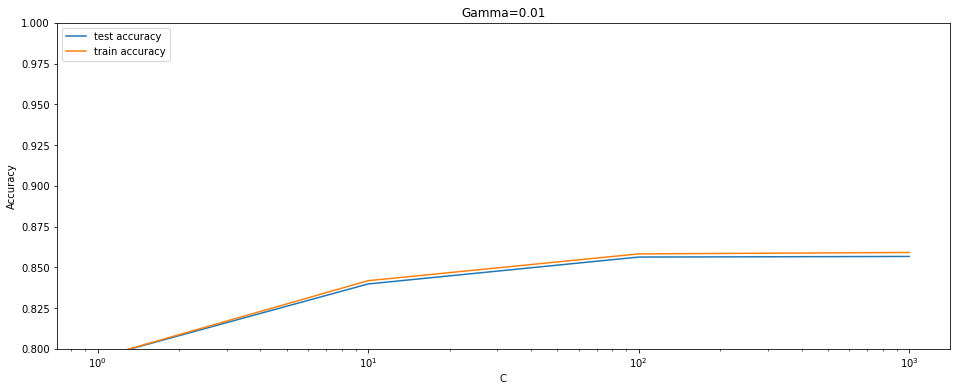

In [343]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### Applying Grid Search to find the best model and the best parameters

In [ ]:
# from sklearn.model_selection import GridSearchCV

# classifier = SVC()
# parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# print("Best accuracy is :/n",best_accuracy)
# best_parameters = grid_search.best_params_
# print("Best parameters are  :/n",best_parameters)


<br />
<br />
<br />
<br />

## `model deployment framework -------------` 

### https://mlflow.org/
### https://www.seldon.io/tech/products/core/ 
### https://medium.com/@xiaowei_6531/putting-sci-kit-learn-models-into-production-with-pmml-1d17b5fc8123


<br />
<br />
<br />
<br />

# `Basic Pipeline --------------------------------------------`

1. Import Dataset
2. Data Preprocessing
3. EDA
4. Feature Selection
5. Train Test Split
6. Feature Transformation
7. List of ML models we will choose
8. Select the best model by grid search
9. Evaluate, iif good stop, If Bad Accuracy Repeat and check

# `End -------------------------`